Dataset Information:
Shape: (301, 9)

First few rows:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2

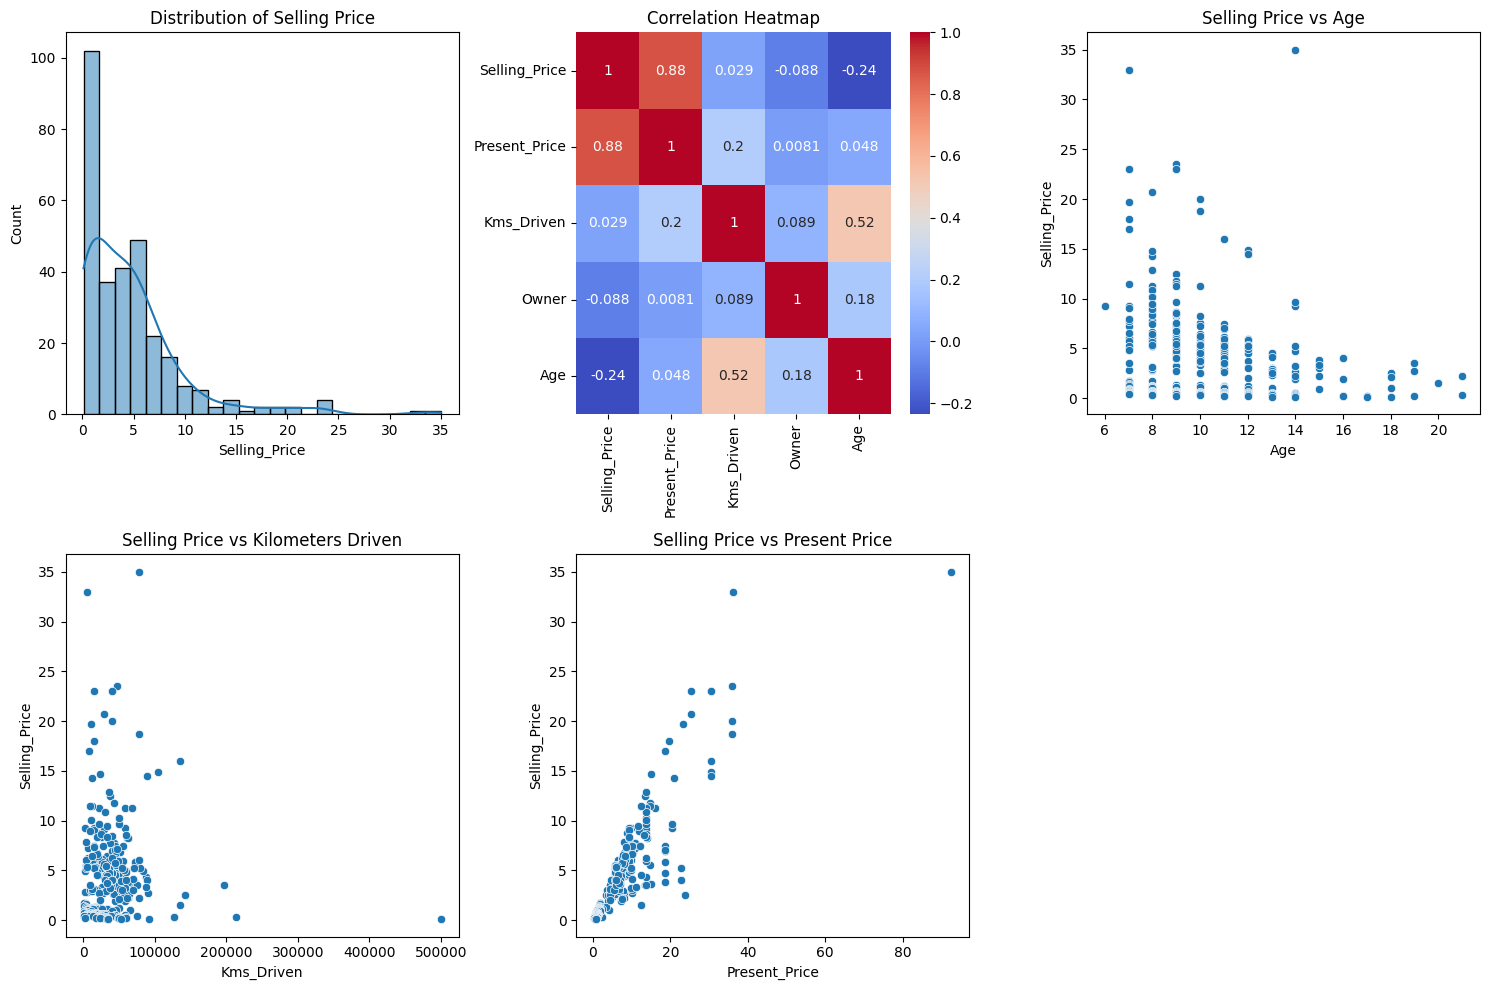

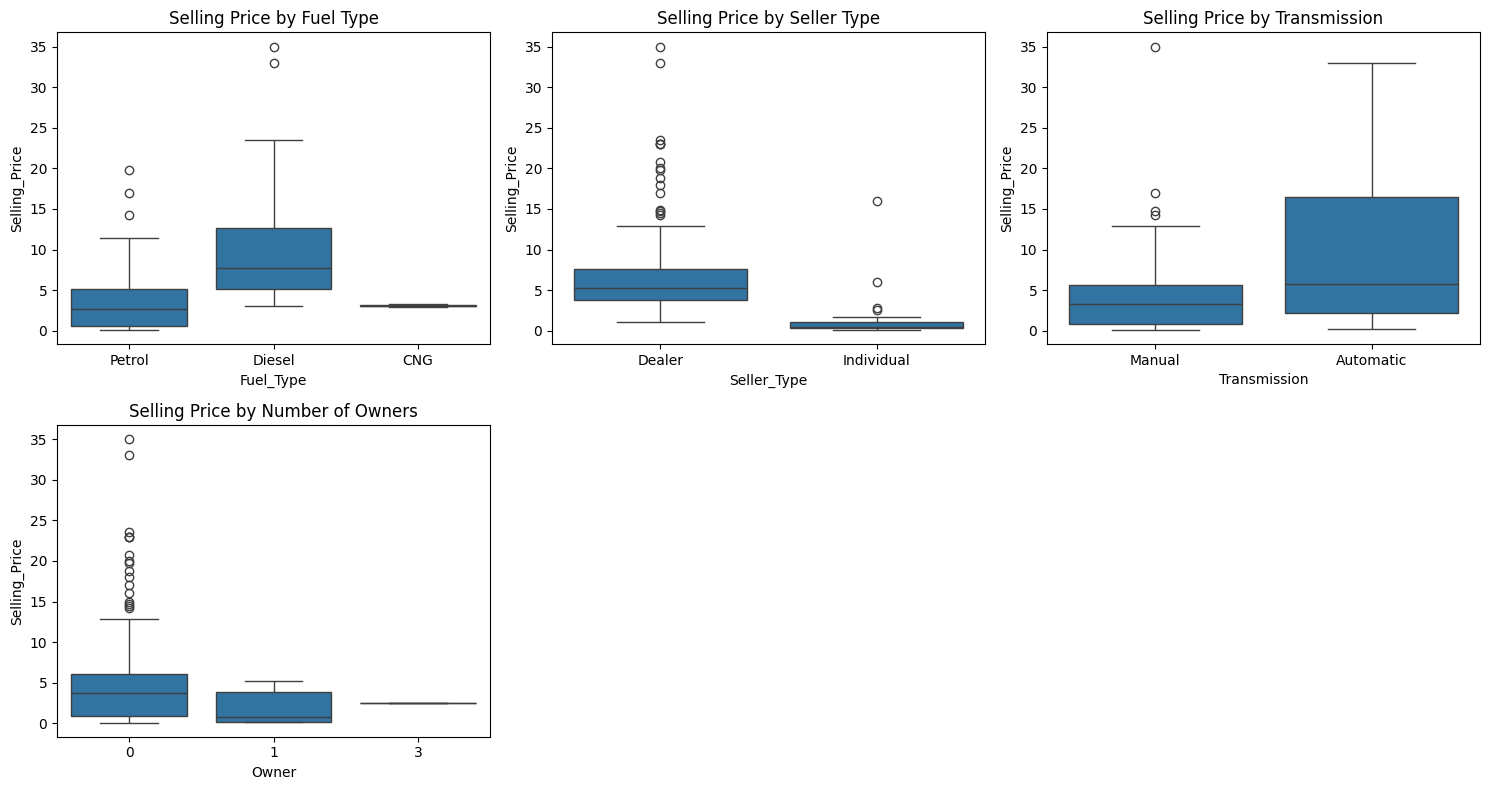


=== Feature Engineering ===
Fuel_Type encoding: {'CNG': np.int64(0), 'Diesel': np.int64(1), 'Petrol': np.int64(2)}
Seller_Type encoding: {'Dealer': np.int64(0), 'Individual': np.int64(1)}
Transmission encoding: {'Automatic': np.int64(0), 'Manual': np.int64(1)}

Processed dataset shape: (301, 8)
Training set: (240, 7), Test set: (61, 7)

=== Model Training ===

Linear Regression:
MAE: 1.22
RMSE: 1.88
R² Score: 0.85

Ridge Regression:
MAE: 1.22
RMSE: 1.88
R² Score: 0.85

Random Forest:
MAE: 0.64
RMSE: 0.97
R² Score: 0.96

Gradient Boosting:
MAE: 0.51
RMSE: 0.80
R² Score: 0.97

=== Feature Importance ===
         feature  importance
0  Present_Price    0.883211
6            Age    0.062692
1     Kms_Driven    0.034222
4   Transmission    0.009749
2      Fuel_Type    0.006455
3    Seller_Type    0.003286
5          Owner    0.000384

=== Sample Predictions ===
Car 1: Predicted Selling Price: ₹6.62 lakhs
Car 2: Predicted Selling Price: ₹15.66 lakhs
Car 3: Predicted Selling Price: ₹2.70 lak

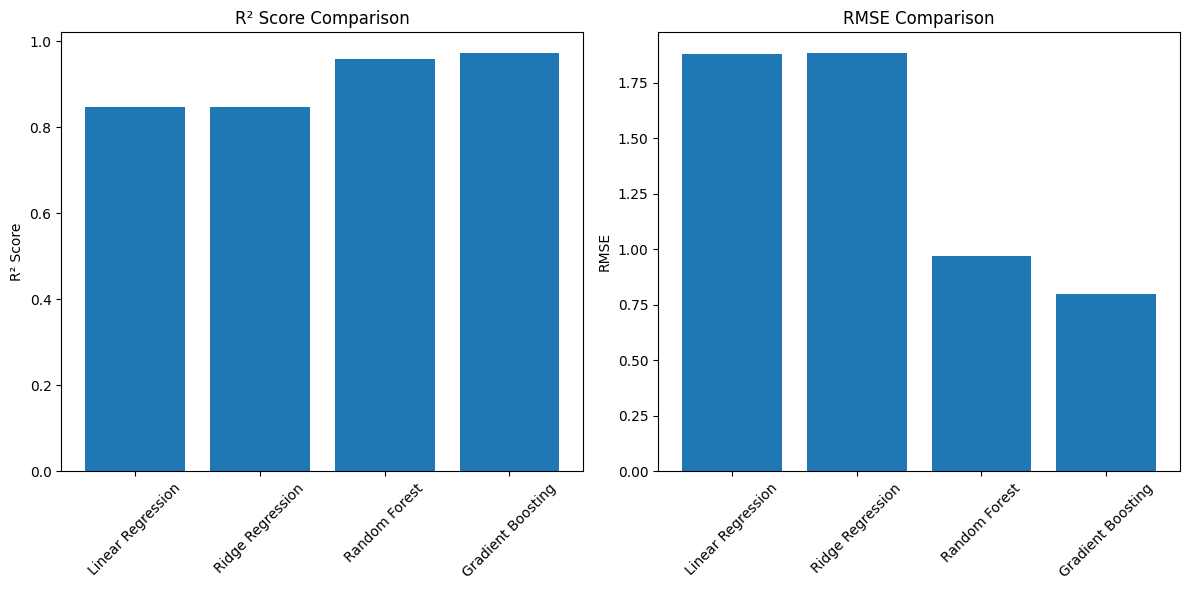


=== Key Insights ===
1. Present Price is the most important feature for predicting selling price
2. Age of the car has strong negative correlation with selling price
3. Diesel vehicles generally have higher resale value
4. Cars sold by dealers fetch higher prices than individual sellers
5. Automatic transmission cars command premium prices
6. Lower number of previous owners increases resale value

Model saved successfully as 'car_price_predictor.pkl'


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('car.csv')

print("Dataset Information:")
print(f"Shape: {data.shape}")
print("\nFirst few rows:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nMissing values:")
print(data.isnull().sum())

# Data Preprocessing
print("\n=== Data Preprocessing ===")

# Convert Year to Age (Years of service)
current_year = 2024
data['Age'] = current_year - data['Year']

# Drop original Year column and Car_Name as they're not useful for prediction
data = data.drop(['Year', 'Car_Name'], axis=1)

print(f"\nModified dataset shape: {data.shape}")

# Check unique values in categorical columns
print("\nCategorical features unique values:")
print(f"Fuel_Type: {data['Fuel_Type'].unique()}")
print(f"Seller_Type: {data['Seller_Type'].unique()}")
print(f"Transmission: {data['Transmission'].unique()}")

# Data Visualization
print("\n=== Data Analysis ===")

plt.figure(figsize=(15, 10))

# 1. Distribution of target variable
plt.subplot(2, 3, 1)
sns.histplot(data['Selling_Price'], kde=True)
plt.title('Distribution of Selling Price')

# 2. Correlation heatmap
plt.subplot(2, 3, 2)
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# 3. Selling Price vs Age
plt.subplot(2, 3, 3)
sns.scatterplot(x=data['Age'], y=data['Selling_Price'])
plt.title('Selling Price vs Age')

# 4. Selling Price vs Kilometers Driven
plt.subplot(2, 3, 4)
sns.scatterplot(x=data['Kms_Driven'], y=data['Selling_Price'])
plt.title('Selling Price vs Kilometers Driven')

# 5. Selling Price vs Present Price
plt.subplot(2, 3, 5)
sns.scatterplot(x=data['Present_Price'], y=data['Selling_Price'])
plt.title('Selling Price vs Present Price')

plt.tight_layout()
plt.show()

# Analyze categorical variables
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.title('Selling Price by Fuel Type')

plt.subplot(2, 3, 2)
sns.boxplot(x='Seller_Type', y='Selling_Price', data=data)
plt.title('Selling Price by Seller Type')

plt.subplot(2, 3, 3)
sns.boxplot(x='Transmission', y='Selling_Price', data=data)
plt.title('Selling Price by Transmission')

plt.subplot(2, 3, 4)
sns.boxplot(x='Owner', y='Selling_Price', data=data)
plt.title('Selling Price by Number of Owners')

plt.tight_layout()
plt.show()

# Feature Engineering
print("\n=== Feature Engineering ===")

# Create a copy for preprocessing
df_processed = data.copy()

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']

for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"{col} encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print(f"\nProcessed dataset shape: {df_processed.shape}")

# Prepare features and target
X = df_processed.drop('Selling_Price', axis=1)
y = df_processed['Selling_Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Model Training and Evaluation
print("\n=== Model Training ===")

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    # Train model
    if name in ['Linear Regression', 'Ridge Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }
    
    print(f"\n{name}:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

# Feature Importance from Random Forest
print("\n=== Feature Importance ===")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)

# Prediction Function
class CarPricePredictor:
    def __init__(self, model, scaler, label_encoders):
        self.model = model
        self.scaler = scaler
        self.label_encoders = label_encoders
        self.current_year = 2024
        
    def predict_price(self, present_price, kms_driven, fuel_type, seller_type, 
                     transmission, owner, year):
        # Calculate age
        age = self.current_year - year
        
        # Encode categorical variables
        fuel_encoded = self.label_encoders['Fuel_Type'].transform([fuel_type])[0]
        seller_encoded = self.label_encoders['Seller_Type'].transform([seller_type])[0]
        transmission_encoded = self.label_encoders['Transmission'].transform([transmission])[0]
        
        # Create feature array
        features = np.array([[present_price, kms_driven, fuel_encoded, 
                            seller_encoded, transmission_encoded, owner, age]])
        
        # Scale features if using linear models
        if isinstance(self.model, (LinearRegression, Ridge)):
            features = self.scaler.transform(features)
        
        # Predict
        predicted_price = self.model.predict(features)[0]
        
        return max(0, predicted_price)  # Ensure non-negative price

# Use the best model (Random Forest based on typical performance)
best_model_name = 'Random Forest'
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

predictor = CarPricePredictor(best_model, scaler, label_encoders)

# Test predictions
print("\n=== Sample Predictions ===")
test_cases = [
    {
        'present_price': 8.5, 'kms_driven': 35000, 'fuel_type': 'Petrol',
        'seller_type': 'Dealer', 'transmission': 'Manual', 'owner': 0, 'year': 2018
    },
    {
        'present_price': 15.0, 'kms_driven': 15000, 'fuel_type': 'Diesel',
        'seller_type': 'Dealer', 'transmission': 'Automatic', 'owner': 0, 'year': 2020
    },
    {
        'present_price': 5.0, 'kms_driven': 80000, 'fuel_type': 'Petrol',
        'seller_type': 'Individual', 'transmission': 'Manual', 'owner': 1, 'year': 2015
    }
]

for i, test_case in enumerate(test_cases, 1):
    predicted = predictor.predict_price(**test_case)
    print(f"Car {i}: Predicted Selling Price: ₹{predicted:.2f} lakhs")

# Model Comparison Visualization
plt.figure(figsize=(12, 6))

# R² Score comparison
r2_scores = [results[model]['R2'] for model in results.keys()]
plt.subplot(1, 2, 1)
plt.bar(results.keys(), r2_scores)
plt.title('R² Score Comparison')
plt.xticks(rotation=45)
plt.ylabel('R² Score')

# RMSE Comparison
rmse_scores = [results[model]['RMSE'] for model in results.keys()]
plt.subplot(1, 2, 2)
plt.bar(results.keys(), rmse_scores)
plt.title('RMSE Comparison')
plt.xticks(rotation=45)
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

print("\n=== Key Insights ===")
print("1. Present Price is the most important feature for predicting selling price")
print("2. Age of the car has strong negative correlation with selling price")
print("3. Diesel vehicles generally have higher resale value")
print("4. Cars sold by dealers fetch higher prices than individual sellers")
print("5. Automatic transmission cars command premium prices")
print("6. Lower number of previous owners increases resale value")

# Save the model and preprocessing objects
import joblib

model_data = {
    'model': best_model,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'feature_names': X.columns.tolist()
}

joblib.dump(model_data, 'car_price_predictor.pkl')
print("\nModel saved successfully as 'car_price_predictor.pkl'")
